# Working with Lattices

In [1]:
import genesis.version4 as g4

%config InlineBackend.figure_format = 'retina' # Nicer plots

## Load an existing lattice file

You can load an existing Genesis4-format Lattices input directly from a file by using `from_file`:

In [2]:
lat = g4.Lattice.from_file("data/basic4/hxr.lat")

In [3]:
lat.elements

{'QHXH17': Quadrupole(L=0.101, k1=1.78),
 'QHXH18': Quadrupole(L=0.101, k1=-1.78),
 'QHXH19': Quadrupole(L=0.101, k1=1.78),
 'QHXH20': Quadrupole(L=0.101, k1=-1.78),
 'QHXH21': Quadrupole(L=0.101, k1=1.78),
 'QHXH22': Quadrupole(L=0.101, k1=-1.78),
 'QHXH23': Quadrupole(L=0.101, k1=1.78),
 'QHXH24': Quadrupole(L=0.101, k1=-1.78),
 'QHXH25': Quadrupole(L=0.101, k1=1.78),
 'QHXH26': Quadrupole(L=0.101, k1=-1.78),
 'QHXH27': Quadrupole(L=0.101, k1=1.78),
 'QHXH28': Quadrupole(L=0.101, k1=-1.78),
 'QHXH29': Quadrupole(L=0.101, k1=1.78),
 'QHXH30': Quadrupole(L=0.101, k1=-1.78),
 'QHXH31': Quadrupole(L=0.101, k1=1.78),
 'QHXH32': Quadrupole(L=0.101, k1=-1.78),
 'QHXH33': Quadrupole(L=0.101, k1=1.78),
 'QHXH34': Quadrupole(L=0.101, k1=-1.78),
 'QHXH35': Quadrupole(L=0.101, k1=1.78),
 'QHXH36': Quadrupole(L=0.101, k1=-1.78),
 'QHXH37': Quadrupole(L=0.101, k1=1.78),
 'QHXH38': Quadrupole(L=0.101, k1=-1.78),
 'QHXH39': Quadrupole(L=0.101, k1=1.78),
 'QHXH40': Quadrupole(L=0.101, k1=-1.78),
 'QH

This `input` object is a convenient dataclass which contains all of the beamline elements and offers some convenience methods.

### See the Genesis4 format of the lattice

We can see the Genesis 4 representation by looking at `lat.to_genesis()`:

In [4]:
print(lat.to_genesis())

QHXH17: quadrupole = {l=0.101, k1=1.78};
QHXH18: quadrupole = {l=0.101, k1=-1.78};
QHXH19: quadrupole = {l=0.101, k1=1.78};
QHXH20: quadrupole = {l=0.101, k1=-1.78};
QHXH21: quadrupole = {l=0.101, k1=1.78};
QHXH22: quadrupole = {l=0.101, k1=-1.78};
QHXH23: quadrupole = {l=0.101, k1=1.78};
QHXH24: quadrupole = {l=0.101, k1=-1.78};
QHXH25: quadrupole = {l=0.101, k1=1.78};
QHXH26: quadrupole = {l=0.101, k1=-1.78};
QHXH27: quadrupole = {l=0.101, k1=1.78};
QHXH28: quadrupole = {l=0.101, k1=-1.78};
QHXH29: quadrupole = {l=0.101, k1=1.78};
QHXH30: quadrupole = {l=0.101, k1=-1.78};
QHXH31: quadrupole = {l=0.101, k1=1.78};
QHXH32: quadrupole = {l=0.101, k1=-1.78};
QHXH33: quadrupole = {l=0.101, k1=1.78};
QHXH34: quadrupole = {l=0.101, k1=-1.78};
QHXH35: quadrupole = {l=0.101, k1=1.78};
QHXH36: quadrupole = {l=0.101, k1=-1.78};
QHXH37: quadrupole = {l=0.101, k1=1.78};
QHXH38: quadrupole = {l=0.101, k1=-1.78};
QHXH39: quadrupole = {l=0.101, k1=1.78};
QHXH40: quadrupole = {l=0.101, k1=-1.78};
QHXH

The lattice parser also works directly with strings if you prefer with `.from_contents`. Try the following:

## Create a lattice from a string

In [5]:
lat = g4.Lattice.from_contents(
    """
CORR32: corrector = {l=0.001};
CORR33: corrector = {l=0.002};
"""
)

In [6]:
lat

Lattice(
  elements={'CORR32': Corrector(L=0.001), 'CORR33': Corrector(L=0.002)},
  filename=pathlib.Path('unknown'),
)

View the lattice in a table format:

In [7]:
lat.to_table()

<!-- lume-genesis detected Jupyter and will use HTML for rendering. -->

<genesis.tools.table_output.<locals>._InfoObj at 0x16b64f800>

## Access elements of a specific type easily

In [8]:
lat.correctors

[Corrector(L=0.001), Corrector(L=0.002)]

## Create a Lattice entirely in Python

In [9]:
lat = g4.Lattice(
    {
        "D1": g4.Drift(L=0.44),
        "D2": g4.Drift(L=0.24),
        "FEL": g4.Line(elements=["FODO"] * 6),
        "FODO": g4.Line(
            elements=["UND", "D1", "QF", "D2", "UND", "D1", "QD", "D2"],
        ),
        "QD": g4.Quadrupole(L=0.08, k1=-2.0),
        "QF": g4.Quadrupole(L=0.08, k1=2.0),
        "UND": g4.Undulator(aw=0.84853, lambdau=0.015, nwig=266, helical=True),
    }
)

In [10]:
print(lat.to_genesis())

D1: drift = {l=0.44};
D2: drift = {l=0.24};
FEL: LINE = {FODO, FODO, FODO, FODO, FODO, FODO};
FODO: LINE = {UND, D1, QF, D2, UND, D1, QD, D2};
QD: quadrupole = {l=0.08, k1=-2.0};
QF: quadrupole = {l=0.08, k1=2.0};
UND: undulator = {aw=0.84853, lambdau=0.015, nwig=266, helical=true};


You can also plot the lattice layout prior to running Genesis4:

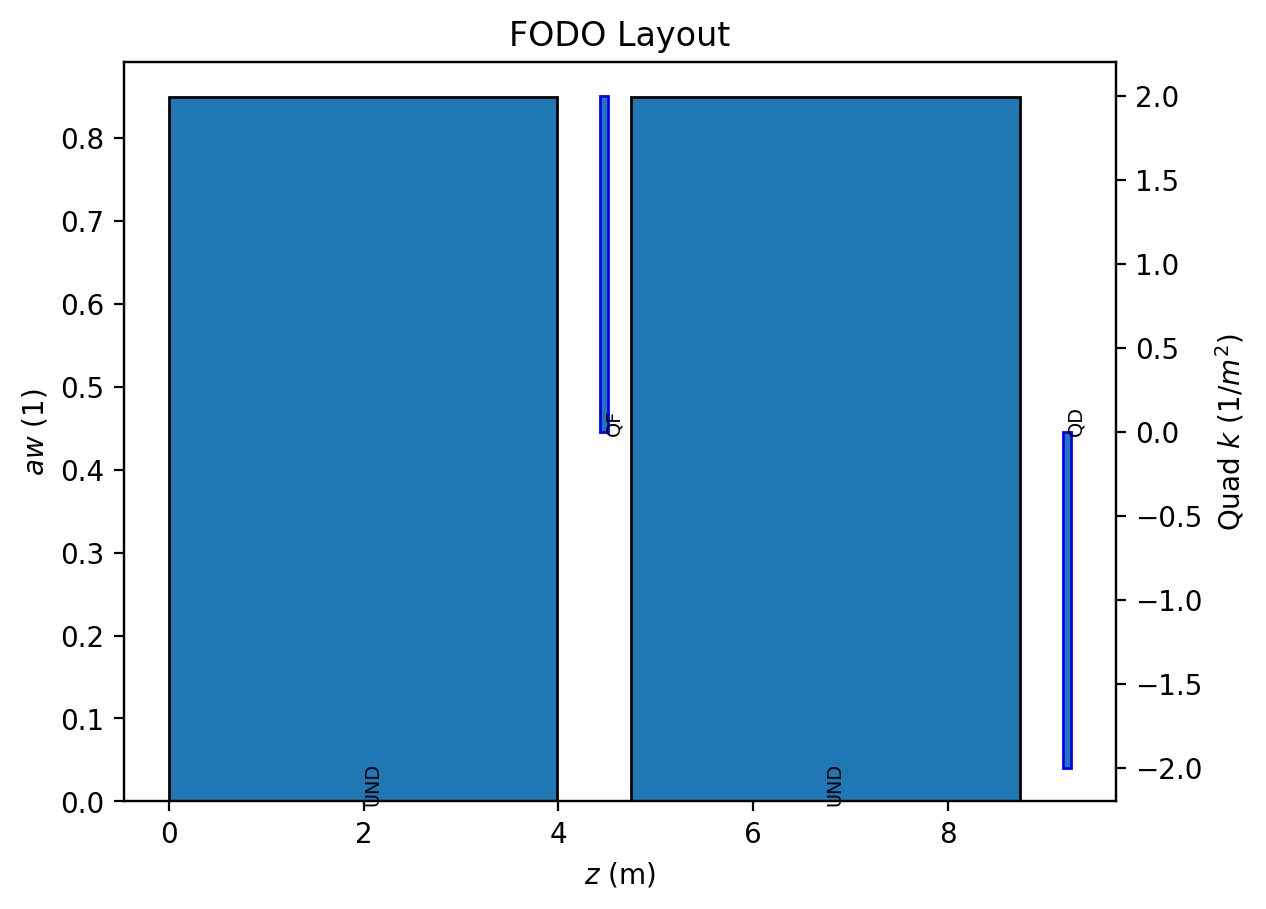

In [11]:
lat.plot("FODO")

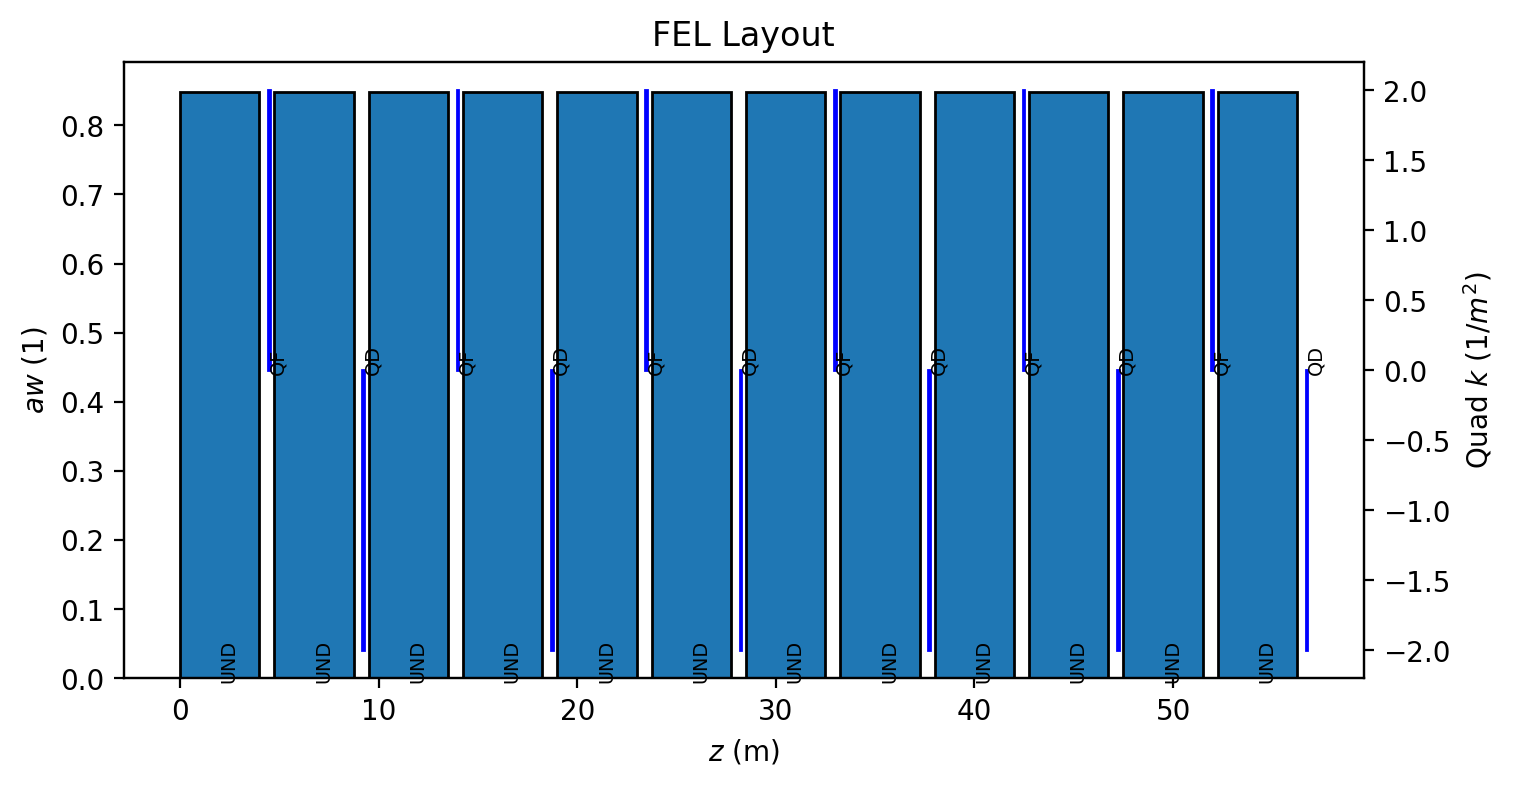

In [12]:
lat.plot("FEL", figsize=(8, 4))

## View detailed information about a single lattice element

In [13]:
lat.undulators[0].to_table()

Attribute,Value,Type,Description
label,UND,str,
type,undulator,str,
aw,0.84853,float,"The dimensionless rms undulator parameter. For planar undulator this value is smaller by a factor $1 / \sqrt{2}$ than its K-value, while for helical undulator rms and peak values are identical."
lambdau,0.015,float,Undulator period length in meter. Default is 0 m.
nwig,266,int,Number of periods.
helical,True,bool,"Boolean flag whether the undulator is planar or helical. A planar undulator has helical=`false`. Note that setting it to `true`, does not change the roll-off parameters for focusing. To be consistent they have to be set directly."
kx,0.0,float,Roll-off parameter of the quadratic term of the undulator field in x. It is normalized with respect to $k_u^2$.
ky,1.0,float,Roll-off parameter of the quadratic term of the undulator field in y.
ax,0.0,float,Offset of the undulator module in $x$ in meter.
ay,0.0,float,Offset of the undulator module in $y$ in meter.
